<a href="https://colab.research.google.com/github/azhgh22/Comparative-analysis-of-Generative-models-on-CIFAR-10/blob/main/experiments/train_vae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Set Env**

In [1]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

from google.colab import userdata
token = userdata.get('GITHUB_TOKEN')
user_name = userdata.get('GITHUB_USERNAME')
mail = userdata.get('GITHUB_MAIL')

!git config --global user.name "{user_name}"
!git config --global user.email "{mail}"
!git clone https://{token}@github.com/azhgh22/Comparative-analysis-of-Generative-models-on-CIFAR-10.git

# **Import**

In [186]:
# Imports
import sys
import os
import torch
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision.utils import make_grid

# Add the root directory of the cloned repository to the Python path
sys.path.append('/content/Comparative-analysis-of-Generative-models-on-CIFAR-10')

import importlib
import data.cifar10 as cifar10_module
import utils.checkpointer as checkpointer_module
import train.train as train_module
import models.VAE_models.conv_vae as conv_vae_module
import samplers.vae_sampler as vae_sampler_module
import utils.weight_init as weight_module
importlib.reload(cifar10_module)
importlib.reload(checkpointer_module)
importlib.reload(train_module)
importlib.reload(conv_vae_module)
importlib.reload(vae_sampler_module)
importlib.reload(weight_module)
from data.cifar10 import load_cifar10
from utils.checkpointer import Checkpointer
from train.train import Train
from models.VAE_models.conv_vae import ConvVAE
from samplers.vae_sampler import vae_sample
from utils.weight_init import WeightsInitializer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


# **Load Cifar Data**

In [8]:
train_loader, _ = load_cifar10(batch_size=128)

In [181]:
import matplotlib.pyplot as plt
from torchvision import transforms

# Convert to HWC for plotting
def show_img(img):
  if img.dim() == 4:
      img = img[0]
  img = img.detach().cpu()
  img = img.clamp(0,1)
  img = img.permute(1,2,0)  # CHW -> HWC
  plt.figure(figsize=(4,4))
  plt.imshow(img, interpolation='nearest')
  plt.axis('off')
  plt.show()

# **Train Model**

In [187]:
%%capture
model = ConvVAE().to(device)
model.apply(WeightsInitializer())

In [188]:
checkpoint_dir = "/content/drive/MyDrive/checkpoints_final/ConvVaeV1"
checkpointer = Checkpointer(checkpoint_dir,"ConvVaeV1",1,False)
train = Train(model,100,train_loader,checkpointer,device)
train.load_checkpoint()
train.train()


No checkpoints found.
Epoch: 1  {'total_loss': 110.78839761094974, 'recon_loss': 106.97800040671892, 'kl_loss': 76.20793883630154}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/ConvVaeV1/ConvVaeV1_epoch_1.pt
Epoch: 2  {'total_loss': 63.38909207707476, 'recon_loss': 55.15706118415384, 'kl_loss': 82.32030535841842}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/ConvVaeV1/ConvVaeV1_epoch_2.pt
Epoch: 3  {'total_loss': 57.73431045259051, 'recon_loss': 47.34535714854365, 'kl_loss': 69.25968615051426}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/ConvVaeV1/ConvVaeV1_epoch_3.pt
Epoch: 4  {'total_loss': 56.17302005309278, 'recon_loss': 44.25927077290957, 'kl_loss': 59.56874441551735}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/ConvVaeV1/ConvVaeV1_epoch_4.pt
Epoch: 5  {'total_loss': 56.04426677147751, 'recon_loss': 42.68675869992932, 'kl_loss': 53.43003225692398}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/ConvVaeV1/ConvVaeV1_ep

[{'total_loss': 110.78839761094974,
  'recon_loss': 106.97800040671892,
  'kl_loss': 76.20793883630154},
 {'total_loss': 63.38909207707476,
  'recon_loss': 55.15706118415384,
  'kl_loss': 82.32030535841842},
 {'total_loss': 57.73431045259051,
  'recon_loss': 47.34535714854365,
  'kl_loss': 69.25968615051426},
 {'total_loss': 56.17302005309278,
  'recon_loss': 44.25927077290957,
  'kl_loss': 59.56874441551735},
 {'total_loss': 56.04426677147751,
  'recon_loss': 42.68675869992932,
  'kl_loss': 53.43003225692398},
 {'total_loss': 56.84438533734178,
  'recon_loss': 42.094550598612834,
  'kl_loss': 49.16611424126589},
 {'total_loss': 58.05239846700293,
  'recon_loss': 41.98869262266037,
  'kl_loss': 45.896303064682904},
 {'total_loss': 59.42148999850768,
  'recon_loss': 42.20465558142308,
  'kl_loss': 43.04208453049135},
 {'total_loss': 60.76527214538106,
  'recon_loss': 42.449877229188104,
  'kl_loss': 40.700878728686085},
 {'total_loss': 62.15863600045519,
  'recon_loss': 42.8665056448153

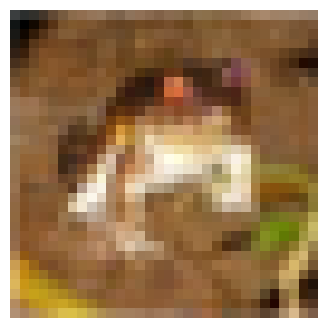

In [189]:
train_dataset = train_loader.dataset
img = train_dataset[0][0]
show_img(img)

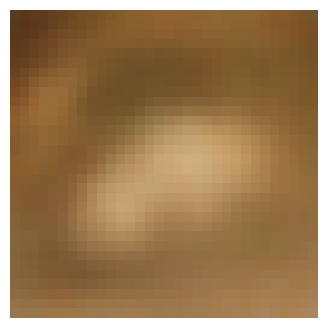

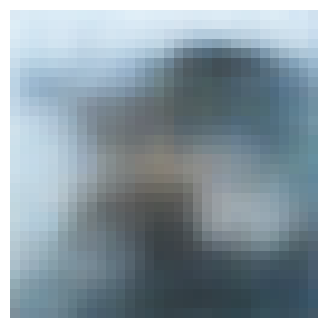

In [194]:
decoder = model.decoder

x = model.forward(img.unsqueeze(0).to(device))
show_img(x[0])

sample = vae_sample(decoder,1)
show_img(sample[0])